<a href="https://colab.research.google.com/github/reggy0/text_classification/blob/main/16.%20Text%20Classification%20Project/Text%20Classification%20Project%20Complete%20v1%20min%20word%20count%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Classification Using Naive Bayes
### Your task is to:
    1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).
    2. Implement Naive Bayes on your own from scratch for text classification. 
    3. Compare Results of your implementation of Naive Bayes with one in Sklearn.
#### Dataset - 
    http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups
#### Comments : 
    Your code must have proper comments for better understanding.
#### Score : 
    Score will be given by the TA based on your submission.
#### Submission : 
    You have to upload zipped file which has python notebook with implementation and dataset used.
#### Your project will be evaluated on following parameters -
    1. Correctness of Code - Own Implementation Naive Bayes (Max Score 50)
    2. Comparison (Max Score 10)
    3. Commenting (Max Score 10)
    4. Correctness of Code - Sklearn Naive Bayes (Max Score 30


In [ ]:

# coding: utf-8

# Data Cleaning


import re

# headers_list contains header words like Xref, Path, From etc. 
# colected them from some of the files

headers_list = []

s = ""

with open("headers_info.txt") as headers_file :
    s += ''.join(headers_file.readlines())

words = s.split(' ')

for word in words :
    if re.search("\w\:", word) != None:
        headers_list.append(word)
headers_list[headers_list.index('Writeto:')] = 'Write to:'
print(headers_list)



"""
the function takes a string corpus of a single document, and the headers_list
Steps in preprocessing:
    1. remove sentences containing headers
    2. remove numbers, punctuations
    3. remove stopwords: imported lists of stopwords from 3 libraries
    
"""
def preprocess_corpus(corpus, headers_list, remove_headers = True):
    
    from nltk.corpus import stopwords
    from spacy.lang.en.stop_words import STOP_WORDS
    from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

    ENGLISH_STOP_WORDS_LIST = list(ENGLISH_STOP_WORDS)
    STOP_WORDS_LIST = list(STOP_WORDS)

    #final list of stop words by merging lists from all three sources
    stop_words = list(set(stopwords.words('english') + ENGLISH_STOP_WORDS_LIST + STOP_WORDS_LIST))
    
    #print(stop_words)
    
    if remove_headers :    
        """
        identify lines containing a header and remove them
        """
        headers_removed_corpus = []
        for line in corpus:
            #line = line.lower()
            line = line.strip()
            if line == '' :
                continue
            is_header = False
            for header in headers_list:
                if header in line:
                    is_header = True
            if not is_header :
                headers_removed_corpus.append(line)
            #else:
            #    print(line)
        #pprint(headers_removed_corpus)
    else:
        headers_removed_corpus = corpus 
    """
    to_english removes non-english words from input string
    """
    import string    
    def to_english(s):
        # remove extra spaces
        arr = re.sub('\s', ' ', s)
        arr = arr.split(' ')
        retval = []
        for word in arr:
            #check word for alphanumeric characters by removing punctuations
            if word.translate(string.punctuation).isalnum() : 
                retval.append(word.strip())
        return ' '.join(retval)

    """
    Removing non english words and punctuations
    """
    non_english_and_punct_removed = []
    for line in headers_removed_corpus:
        clean_line = []
        #print(line)
        #remove punctuations using regex
        line = re.sub("[:,-]", ' ', line) 
        line = re.sub("[!\"#$%&\'()\*\+,\-\./:;<=>?@\[\\\]^_`{|}~]", ' ', line) #,'!"#$%&()*,-.:;<=>?@^_`{|}~'
        #print(line)
        words = line.split(' ')
        for word in words:
            clean_line.append(to_english(word).strip())
        clean_line = (' '.join(clean_line)).strip()
        # remove extra spaces
        clean_line = re.sub('\s +', ' ', clean_line)
        #filter empty strings
        if clean_line != '':
            non_english_and_punct_removed.append(clean_line)
    #pprint(non_english_and_punct_removed)

    """
    remove stopwords
    """
    stop_words_removed = []
    
    for line in non_english_and_punct_removed:
        words = line.split(' ')
        new_line = []
        for word in words:
            # remove numbers
            word = re.sub("[0-9]+", '', word)
            # remove extra spaces
            word = re.sub("\s", ' ', word)
            #convert word to lawer case
            word = word.strip().lower()
            if word == '' :
                continue
            if word not in stop_words:
                new_line.append(word)
        new_line = ' '.join(new_line)
        if new_line != '' :
            stop_words_removed.append(new_line)
    #pprint(stop_words_removed)
    
    final_data = '.'.join(stop_words_removed)
    return final_data

"""
dummy function to find paths of all files in data files folder
"""
def find_all_paths():
    document_paths = []
    from pprint import pprint
    import os
    walk = os.walk('.\\20_newsgroups', topdown = False)
    for root, dirs, files in walk :
        for file in files:
            doc = {}
            doc['root'] = root # path to folder containing the data files
            doc['file'] = file # file name
            document_paths.append(doc)
    return document_paths
#pprint(document_paths[0:100])

"""
dummy function to preprocess all the data files and create new clean data files

"""
def clean_all_docs(document_paths, remove_headers = True) :
    corpus = ""
    i = 0
    import time
    st = time.time()
    new_paths = []
    for doc_path in document_paths:
        #if i == 2 :
        #    break
        path = doc_path['root'] + "\\" + doc_path['file']
        with open(path) as doc :
            data = doc.readlines()
            i += 1
            # preprocess data of currnt file
            clean_corpus = preprocess_corpus(data, headers_list, remove_headers)
            
            clean_data_file_root = doc_path['root'].replace('.\\','.\\clean_data\\')
            
            # create directory if does not already exist
            os.makedirs(clean_data_file_root, exist_ok = True)
            # actual path of clean data file 
            clean_data_file_path = clean_data_file_root + "\\" +doc_path['file'] + '.txt'
            # write to clean data file
            with open(clean_data_file_path, 'wb') as file_clean_data :
                file_clean_data.write(bytes(clean_corpus,'utf8'))
                file_clean_data.close()
            doc.close()
            
            #verbose
            if i % 1000 == 0 :
                print( i, "Files Processed in", round(time.time() - st, 3), "sec")
                st = time.time()


document_paths = find_all_paths()

"""

Option to remove headers since for this dataset, removing headers actually decreases accuracy of classifier

"""
clean_all_docs(document_paths, remove_headers = True)
#pprint(new_paths)


['Xref:', 'Path:', 'From:', 'Newsgroups:', 'Subject:', 'FAQ:', 'Message-ID:', 'Date:', 'Expires:', 'Followup-To:', 'Distribution:', 'Organization:', 'Approved:', 'Supersedes:', 'Archive-name:', 'Alt-atheism-archive-name:', 'Last-modified:', 'Write to:', 'Summary:', 'Keywords:', 'Version:', 'Lines:', 'Telephone:', 'or:', 'Telephone:', 'Fax:']
1000 Files Processed in 14.614 sec
2000 Files Processed in 15.726 sec
3000 Files Processed in 17.519 sec
4000 Files Processed in 13.529 sec
5000 Files Processed in 13.735 sec
6000 Files Processed in 17.42 sec
7000 Files Processed in 12.627 sec
8000 Files Processed in 14.247 sec
9000 Files Processed in 14.235 sec
10000 Files Processed in 15.27 sec
11000 Files Processed in 15.496 sec
12000 Files Processed in 16.25 sec
13000 Files Processed in 14.888 sec
14000 Files Processed in 15.276 sec
15000 Files Processed in 16.171 sec
16000 Files Processed in 19.736 sec
17000 Files Processed in 16.441 sec
18000 Files Processed in 21.34 sec
19000 Files Processed

In [ ]:

# coding: utf-8


from pprint import pprint
from nltk.corpus import words as nltk_words

#english dictionary contains english words from NLTK, dictionary for fast access
english_dictionary = {word : True for word in list(set(nltk_words.words()))}

"""
check if input word is an english word 
"""

def is_in_english(word):
    try:
        return english_dictionary[word]
    except:
        return False

"""
Build Dictionary of Words
"""

# document paths stores paths to all clean data files 
document_paths = []

# pretty print module for better output format
from pprint import pprint
import os
# find all file paths in clean data folder
walk = os.walk('.\\clean_data\\20_newsgroups', topdown = False)
for root, dirs, files in walk :
    for file in files:
        doc = {}
        dir_ = root.split('\\')[-1]
        doc['path'] = root+"\\"+file
        doc['target'] = dir_
        document_paths.append(doc)
#pprint(document_paths[0:10000:100])

import pandas as pd
df = pd.DataFrame(document_paths)
#df.head()

# targets is list of all class names
targets = list(set(df['target'].values))
pprint(targets)

# class_dict contains indices mapped to actual class names
class_dict = { i : targets[i] for i in range(len(targets))}
pprint(class_dict)

# class is numeric representation for class name
# categry is the actual class name
class_df = pd.DataFrame()
class_df['class'] = class_dict
class_df['category'] = [class_dict[key] for key in class_dict]
class_df.to_csv("class_dict.csv", index = False)

df['class'] = [targets.index(target) for target in df['target'].values]

df.head()

X = df['path']
Y = df['class']
print(X[0:5])
print(Y[0:5])


"""
Split the final data files into training and testing datasets(actually containing the file paths)
"""
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

train_df = pd.DataFrame()
train_df['path'] = X_train
train_df['class'] = Y_train

#save file storing the paths to train files
train_df.to_csv("train_files.csv", index = False)

#save file storing the paths to test files
test_df = pd.DataFrame()
test_df['path'] = X_test
test_df['class'] = Y_test
test_df.to_csv("test_files.csv", index = False)

train_df.head()

train_df.head()

test_df.head()

"""

Build Master Dictionary that is used to decide the features 

master_dictionary is mapping of each english word with its count

"""

master_dictionary = {}

i = 0
import time
st = time.time()
new_paths = []
for doc_path in X_train:
    #if i == 1 :
    #    break
    path = doc_path
    with open(path) as doc :
        num_tokens_in_doc = 0
        data = ''.join(doc.readlines()).split('.')
        for line in data:
            for word in line.split():
                # non english words can't be used as features for this dataset
                if not is_in_english(word):
                    continue
                #print(word)
                # using try/catch approach for very fast search
                try:
                    master_dictionary[word] += 1
                except KeyError:
                    master_dictionary[word] = 1
                    continue
        doc.close()
        i += 1
        # verbose
        if i % 1000 == 0 :
            print( i, "Files Processed in", round((time.time() - st), 3) , "sec")
            st = time.time()
#print(master_dictionary)

import numpy as np
keys = list(master_dictionary)
freq = np.array([ master_dictionary[key] for key in keys])

words_df = pd.DataFrame()
words_df['word'] = keys
words_df['frequency'] = freq

# all words csv contains master dictionary
words_df.to_csv('all_words.csv', index = False)

['rec.motorcycles',
 'rec.sport.hockey',
 'talk.politics.guns',
 'alt.atheism',
 'sci.crypt',
 'sci.space',
 'talk.religion.misc',
 'rec.autos',
 'talk.politics.mideast',
 'misc.forsale',
 'comp.graphics',
 'soc.religion.christian',
 'sci.med',
 'sci.electronics',
 'comp.os.ms-windows.misc',
 'comp.windows.x',
 'rec.sport.baseball',
 'talk.politics.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware']
{0: 'rec.motorcycles',
 1: 'rec.sport.hockey',
 2: 'talk.politics.guns',
 3: 'alt.atheism',
 4: 'sci.crypt',
 5: 'sci.space',
 6: 'talk.religion.misc',
 7: 'rec.autos',
 8: 'talk.politics.mideast',
 9: 'misc.forsale',
 10: 'comp.graphics',
 11: 'soc.religion.christian',
 12: 'sci.med',
 13: 'sci.electronics',
 14: 'comp.os.ms-windows.misc',
 15: 'comp.windows.x',
 16: 'rec.sport.baseball',
 17: 'talk.politics.misc',
 18: 'comp.sys.ibm.pc.hardware',
 19: 'comp.sys.mac.hardware'}
0    .\clean_data\20_newsgroups\alt.atheism\49960.txt
1    .\clean_data\20_newsgroups\alt.atheism\51060.

9923
7904


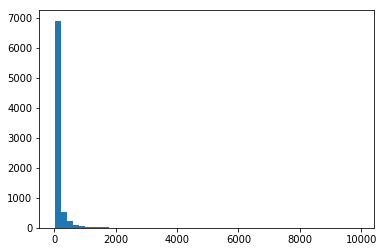

No. of common words :  0
No. of rare words :  13340


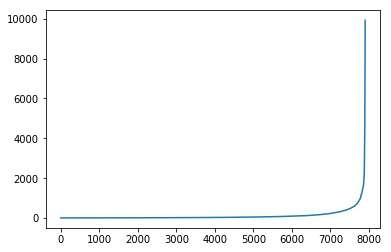

7886
['article', 'branch', 'reality', 'likely', 'gotten', 'highly', 'happen', 'forget', 'cult', 'responsible', 'expect', 'sole', 'responsibility', 'trial', 'following', 'right', 'continue', 'believe', 'worship', 'sabbath', 'best', 'known', 'seventh', 'day', 'argue', 'act', 'regular', 'service', 'special', 'meeting', 'cor', 'explicitly', 'observe', 'god', 'kind', 'power', 'cause', 'affected', 'equipment', 'couple', 'sound', 'kicking', 'stereo', 'direct', 'rectification', 'mighty', 'strong', 'powerful', 'car', 'stall', 'engine', 'battery', 'lot', 'like', 'radio', 'actually', 'shut', 'completely', 'goes', 'suspect', 'voltage', 'far', 'try', 'vehicle', 'idle', 'crank', 'low', 'start', 'extra', 'current', 'drawn', 'speed', 'drop', 'alternator', 'compensate', 'resolution', 'problem', 'matter', 'company', 'ultimately', 'resolve', 'pay', 'attention', 'citizen', 'send', 'pamphlet', 'apply', 'talking', 'help', 'able', 'install', 'filtering', 'panel', 'recommend', 'type', 'licensed', 'transmitter

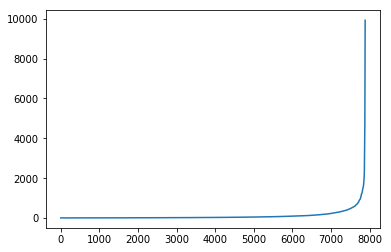

In [ ]:
# coding: utf-8

import numpy as np
import pandas as pd

# load master dictionary
words_df = pd.DataFrame(pd.read_csv("all_words.csv"))

words_df.head()

all_words = words_df['word']
freq = words_df['frequency']

# rebuild master dictionary object
master_dictionary = {all_words[i] : freq[i] for i in range(len(freq))}

print(max(freq))

# feature frequency range to be set here
max_allowed_freq = max(freq)
min_allowed_freq = 10

# plot histogram just for fun
filtered_freq = [f for f in freq if (f <= max_allowed_freq and f >= min_allowed_freq)]
print(len(filtered_freq))
import matplotlib.pyplot as plt
plt.hist(filtered_freq, 50)
plt.show()

# ignore
too_common_words = [word for word in master_dictionary if master_dictionary[word] > max_allowed_freq]
print("No. of common words : ", len(too_common_words))


# ignore
too_rare_words = [word for word in master_dictionary if master_dictionary[word] < min_allowed_freq]
print("No. of rare words : ", len(too_rare_words))
#print(too_rare_words)

"""
Visualize the range of frequencies of selected words 
"""
import matplotlib.pyplot as plt
Y_freq = freq[freq >= min_allowed_freq]
Y_freq = Y_freq[Y_freq <= max_allowed_freq]
plt.plot(np.sort(Y_freq))
plt.show()

selected_words = [word for word in all_words 
                  if master_dictionary[word] >= min_allowed_freq 
                  and master_dictionary[word] <= max_allowed_freq 
                  and type(word) == str 
                  and len(word) > 1]

#for word in keys:
#    if freq
print(len(selected_words))
print(selected_words)

selected_words_freq = [master_dictionary[word] for word in selected_words]
plt.plot(np.sort(selected_words_freq))
plt.show()

selected_words_df = pd.DataFrame()
selected_words_df['word'] = selected_words
selected_words_df['frequency'] = selected_words_freq

"""
selected words are words chosen as features from the master dictionary
"""
selected_words_df.to_csv('selected_words.csv', index = False)


In [ ]:

# coding: utf-8

"""
Build Dataset of word counts as features
"""
def prepare_dataset(selected_words_file_path, data_files_path):
    import numpy as np
    import pandas as pd
    
    # load class dict
    class_dict_df = pd.DataFrame(pd.read_csv("class_dict.csv"))
    #class_dict_df.head()

    # load selected words dictionary
    #selected_words_df = pd.DataFrame(pd.read_csv('all_words.csv'))
    selected_words_df = pd.DataFrame(pd.read_csv(selected_words_file_path))
    #selected_words_df.head()

    selected_words = selected_words_df['word'].values
    
    selected_words_dictionary = {word : True for word in selected_words}
    
    
    #number of selected words
    num_selected_words = len(selected_words)

    #load file containing document paths
    data_file_paths_df = pd.DataFrame(pd.read_csv(data_files_path))
    #data_file_paths_df.head()

    data_file_paths = data_file_paths_df['path'].values
    
    #directly used as target Y
    data_file_class = data_file_paths_df['class'].values

    import time
    matrix = []
    st = time.time()
    for i in range(len(data_file_paths)) :
        #if i == 2000:
        #    break
    
        if (i+1) % 1000 == 0 :
            et = time.time()
            print( i+1, "Files Processed in", round((time.time() - st), 3) , "sec")
            st = time.time()    
        path = data_file_paths[i]
        target = data_file_class[i]
        with open(path) as file :
            X = []
            count = {}
            data = file.readlines()
            words_in_file = (''.join(data)).split(' ')
            for word in words_in_file:
                try:
                    if selected_words_dictionary[word]:
                        # try catch approach for fast search
                        try:
                            count[word] += 1
                        except:
                            count[word] = 1
                except:
                    continue
            for word in selected_words:
                # try catch approach for fast search
                try :
                    X = count[word] 
                except :
                    count[word] = 0 
            #print(X)
            X = [count[word] for word in selected_words if word in count] 
            #print(len(X))
            matrix.append(X)
            #X_train_df.iloc[i, :] = 
            file.close()
    #print(len(matrix))
    #print(len(matrix[0]))

    X_df = pd.DataFrame(matrix, columns = selected_words)

    #X_df.describe()

    import copy
    X = X_df.values
    Y = copy.deepcopy(data_file_class)
    print(X.shape)
    print(Y.shape)

    dataset_df = pd.DataFrame(X_df)
    dataset_df['target'] = Y
    return dataset_df

train_files_path = "train_files.csv"
test_files_path = "test_files.csv"

selected_words_file_path = 'selected_words.csv'

train_dataset_df = prepare_dataset(selected_words_file_path, train_files_path)
train_dataset_df.to_csv("20_newsgroups_dataset_min_freq_10.csv", index = False)

test_dataset_df = prepare_dataset(selected_words_file_path, test_files_path)
test_dataset_df.to_csv("20_newsgroups_test_dataset_min_freq_10.csv", index = False)

1000 Files Processed in 38.048 sec
2000 Files Processed in 32.477 sec
3000 Files Processed in 26.232 sec
4000 Files Processed in 26.376 sec
5000 Files Processed in 23.728 sec
6000 Files Processed in 24.878 sec
7000 Files Processed in 23.198 sec
8000 Files Processed in 22.77 sec
9000 Files Processed in 21.758 sec
10000 Files Processed in 20.496 sec
11000 Files Processed in 21.721 sec
12000 Files Processed in 23.104 sec
13000 Files Processed in 22.862 sec
14000 Files Processed in 22.733 sec
(14997, 7886)
(14997,)
1000 Files Processed in 18.288 sec
2000 Files Processed in 14.967 sec
3000 Files Processed in 14.699 sec
4000 Files Processed in 12.319 sec
5000 Files Processed in 12.871 sec
(5000, 7886)
(5000,)


In [ ]:

# coding: utf-8

import numpy as np
import pandas as pd

# load training dataset
import time
st = time.time()
train_dataset_df = pd.read_csv("20_newsgroups_dataset_min_freq_10.csv")
et = time.time()

print("Loading Time for Training Set:", round((et-st)*1000), "millisecond")

train_dataset_df.describe()

X_train_df = train_dataset_df.drop('target', axis = 1) 
Y_train_df = train_dataset_df['target']

# X_train_df.describe()

# Y_train_df.describe()

# load testing dataset
import time
st = time.time()
test_dataset_df = pd.read_csv("20_newsgroups_test_dataset_min_freq_10.csv")
et = time.time()

print("Loading Time for Test Set:", round((et-st)*1000), "millisecond")

test_dataset_df.describe()

X_test_df = test_dataset_df.drop('target', axis = 1)
Y_test_df = test_dataset_df['target']

# X_test_df.describe()

# Y_test_df.describe()

words = X_train_df.columns
#print(words)
possible_classes = list(set(Y_train_df.values))
#print(possible_classes)

# predict class for single document
def predict_single(X, model) :
    
    # initial max class probablity, and assigned class
    max_class_prob = -np.inf
    max_class = None
    # all possible classes
    possible_classes = model.keys()
    # find probablities of this document belonging to each of the possible classes 
    for y in possible_classes :
        # convert input array to numpy array in case it isn't
        X = np.array(X)
        
        # assign class prior
        prob_X_equals_x_given_Y_equals_y = model[y]['class_prior']
        # multinomial feature probability addition to get probability 
        # that this document belongs to current class
        prob_X_equals_x_given_Y_equals_y += (X * model[y]['log_prob_sum']).sum()
        
        # if prob is max update max_class variables
        if prob_X_equals_x_given_Y_equals_y > max_class_prob :
            max_class_prob = prob_X_equals_x_given_Y_equals_y
            max_class = y
    return max_class

"""
Internal function
generate_model takes as input a dictionary and 
a tuning parameter alpha that accounts for probability correction(similar to the inbuilt classifer)
"""
def generate_model(dictionary, alpha) :
    model = {}
    possible_classes = dictionary['possible_classes']
    num_words = dictionary["vocabulary_size"]
    
    range_words = range(num_words)
    
    for y in possible_classes :
        #class_prior
        model[y] = {}
        prob_Y_equals_y = np.log(dictionary[y]["class_count"]/dictionary["total_data"])
        prob_X_equals_x_given_Y_equals_y = 0 
        prob_X_equals_x_given_Y_equals_y += prob_Y_equals_y
        total_words_in_class_y_docs = dictionary[y]["total_words"]        
        count_f_class_y = np.array([dictionary[y][f] for f in range_words])
        prob_f_class_y = (count_f_class_y+alpha)/(total_words_in_class_y_docs + alpha*num_words) 
        
        model[y]['class_prior'] = prob_Y_equals_y
        model[y]['log_prob_sum'] = np.log(prob_f_class_y)
    
    return model
    

def predict(X, model) :
    #if not isinstance(X[0], list) :
    #    return None #predict_single(X, model)
    Y_pred = []
    for x in X :
        Y_pred.append(predict_single(x, model))
    return Y_pred

"""
fit function takes as input the trainig dataset and alpha, the tuning parameter
"""
def fit(X, Y, alpha) :
    # check if alpha is in range of [0, 1]
    # if not set alpha to 1
    if alpha > 1 or alpha < 0 :
        print("Alpha parameter not in range [0,1]...")
        print("setting alpha = 1")
        alpha = 1
    num_words = len(X[0])
    possible_classes = list(set(Y))
    
    #dictionary with keys as possible classes, total number of training documents, vocabulary size
    dictionary = {}
    dictionary["total_data"] = len(Y)
    dictionary["vocabulary_size"] = num_words
    dictionary["possible_classes"] = possible_classes
    
    # build internal dictionaries for each of the possible classes
    # dict mapped to each class contains keys: 
    # total words and 
    # a class count that is the total number of training documents belonging to current class 
    
    for y in possible_classes :
        y_dict = {i : X[Y == y, i].sum() for i in range(num_words)}
        y_dict['total_words'] = sum(y_dict.values())
        y_dict['class_count'] = sum(Y == y)
        #print(y_dict['total_count'])
        dictionary[y] = y_dict
    # call is made to generate model function that uses the "dictionary" and 
    # alpha 
    # to find effect on probabilities of a document belonging to a particular class
    # separate function for simplicity
    return generate_model(dictionary, alpha)

# fit the model
import time
st = time.time()
model = fit(X_train_df.values, Y_train_df.values, 0.01)
et = time.time()

print("Training Time:", round((et-st)*1000), "millisecond")

#print(model)

"""
Train Data Evaluation
"""
import time
st = time.time()
Y_train_pred = predict(X_train_df.values, model)
et = time.time()

print("Prediction Time for Training Set:", round((et-st)*1000), "millisecond")

#print(Y_train_pred)

from sklearn.metrics import confusion_matrix

from pprint import pprint
print("Confusion Matrix for Training Dataset")
pprint(confusion_matrix(Y_train_pred, Y_train_df.values))

from sklearn.metrics import classification_report
print("classification Report for Training Dataset")
print(classification_report(Y_train_pred, Y_train_df.values))

"""
Test Data Evaluation
"""
import time
st = time.time()
Y_test_pred = predict(X_test_df.values, model)
et = time.time()

print("Prediction Time for Testing Set:", round((et-st)*1000), "millisecond")

training_time = (et-st)
print(training_time)

from sklearn.metrics import confusion_matrix

from pprint import pprint
print("Confusion Matrix for Test Dataset")
pprint(confusion_matrix(Y_test_pred, Y_test_df.values))

from sklearn.metrics import classification_report
print("classification Report for Test Dataset")
print(classification_report(Y_test_pred, Y_test_df.values))

Loading Time for Training Set: 25389 millisecond
Loading Time for Test Set: 8869 millisecond
Training Time: 13223 millisecond
Prediction Time for Training Set: 12166 millisecond
Confusion Matrix for Training Dataset
array([[648,   3,   2,   5,   2,   5,   3,  18,   2,   7,   6,   3,  10,
          3,   6,   6,  10,   3,   4,   7],
       [  5, 712,   6,   5,   7,   2,   5,   7,   7,  15,   8,   4,   9,
          5,  14,   6,  30,   3,   4,   6],
       [  4,   2, 658,  11,   9,   2,  28,   6,   7,   2,   4,   5,   6,
          0,   4,   1,   6,  34,   1,   1],
       [  0,   1,   7, 637,   2,   4, 106,   2,  15,   3,   3,  18,   3,
          2,   1,   3,   0,   5,   1,   0],
       [  2,   1,   9,   3, 684,   5,   5,   3,   5,   3,   2,   4,   4,
         11,   2,   5,   1,   1,   6,   4],
       [  2,   1,   4,   4,   0, 676,   4,   5,   2,   1,   8,   2,   4,
          2,   5,   6,   1,   4,   3,   2],
       [  2,   0,  16,  52,   3,   4, 514,   2,   7,   1,   1,   9,   5,
         

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import time
st = time.time()
sklearn_model = MultinomialNB(alpha = 0.01)
sklearn_model.fit(X_train_df.values, Y_train_df.values)
et = time.time()
print("Training Time:", round((et-st)*1000), "millisecond")

import time
st = time.time()
Y_train_pred = sklearn_model.predict(X_train_df.values)
et = time.time()
print("Prediction Time for Training Set:", round((et-st)*1000), "millisecond")

print("Confusion Matrix for Training Dataset")
pprint(confusion_matrix(Y_train_pred, Y_train_df.values))

print("classification Report for Training Dataset")
print(classification_report(Y_train_pred, Y_train_df.values))

import time
st = time.time()
Y_test_pred = sklearn_model.predict(X_test_df.values)
et = time.time()
print("Prediction Time for Test Set:", round((et-st)*1000), "millisecond")

print("Confusion Matrix for Test Dataset")
pprint(confusion_matrix(Y_test_pred, Y_test_df.values))

print("classification Report for Test Dataset")
print(classification_report(Y_test_pred, Y_test_df.values))

Training Time: 1138 millisecond
Prediction Time for Training Set: 973 millisecond
Confusion Matrix for Training Dataset
array([[648,   3,   2,   5,   2,   5,   3,  18,   2,   7,   6,   3,  10,
          3,   6,   6,  10,   3,   4,   7],
       [  5, 712,   6,   5,   7,   2,   5,   7,   7,  15,   8,   4,   9,
          5,  14,   6,  30,   3,   4,   6],
       [  4,   2, 658,  11,   9,   2,  28,   6,   7,   2,   4,   5,   6,
          0,   4,   1,   6,  34,   1,   1],
       [  0,   1,   7, 637,   2,   4, 106,   2,  15,   3,   3,  18,   3,
          2,   1,   3,   0,   5,   1,   0],
       [  2,   1,   9,   3, 684,   5,   5,   3,   5,   3,   2,   4,   4,
         11,   2,   5,   1,   1,   6,   4],
       [  2,   1,   4,   4,   0, 676,   4,   5,   2,   1,   8,   2,   4,
          2,   5,   6,   1,   4,   3,   2],
       [  2,   0,  16,  52,   3,   4, 514,   2,   7,   1,   1,   9,   5,
          1,   4,   3,   2,  54,   1,   3],
       [  5,   1,   4,   1,   1,   7,   3, 639,   4,  11,   1

### Comparison of results obtained from own implementation and the inbuilt classifier in sklearn 

(referring to inbuilt classifier as MultinomialNB)

1. With the same dataset and alpha parameter, MultinomialNB and my own implementation give exactly the same results.
2. The speed of MultinomialNB is around 10 times, since its implemented with cython.
3. Without removing headers, I got an F1 Score of 0.89, MultinomialNB performed likewise.
4. Increasing the number of features boosts the score till a minimum frequency only